In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("household_power_consumption.txt",sep=';',parse_dates=[['Date', 'Time']])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.



In [68]:
df.head()

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [69]:
#check for missing values
df.isnull().values.any()
#There are no missing values in our dataset however, in bid to explain how we handle

True

In [70]:
df.isna().sum()

Date_Time                    0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [75]:
#Filling missing data by interpolation
df = df.interpolate(method='linear', limit_direction='forward')
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [78]:
#df=df.head(100)

df["Date_Time"]=pd.to_datetime(df['Date_Time'])
df.set_index("Date_Time", inplace=True)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date_Time,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


Text(0, 0.5, 'Global_active_power')

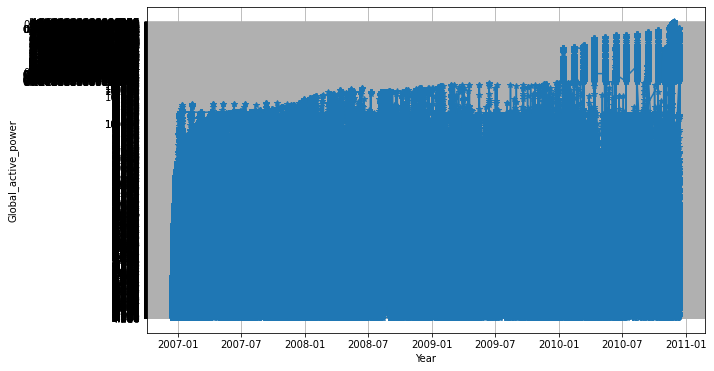

In [79]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df.Global_active_power.astype(str), marker='*' )
plt.grid()
plt.xlabel('Year')
plt.ylabel('Global_active_power')

In [80]:
#Upsample to daily data points
df_daily = df.resample('D').mean()

Text(0, 0.5, 'Global_reactive_power')

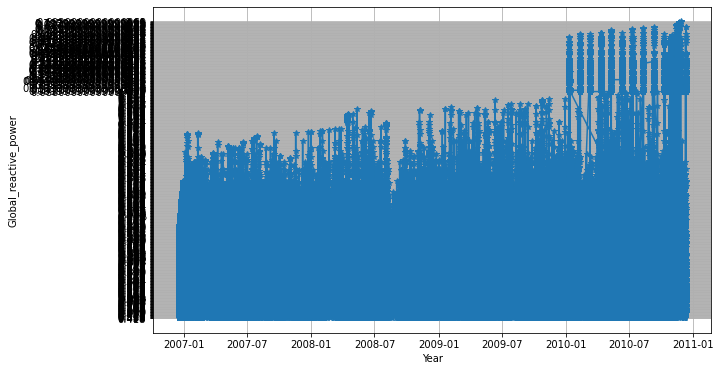

In [81]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df.Global_reactive_power.astype(str), marker='*' )
plt.grid()
plt.xlabel('Year')
plt.ylabel('Global_reactive_power')

Text(0, 0.5, 'Voltage')

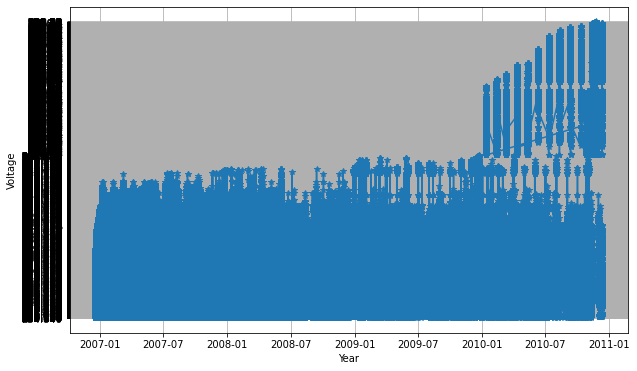

In [82]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df.Voltage.astype(str), marker='*' )
plt.grid()
plt.xlabel('Year')
plt.ylabel('Voltage')

Text(0, 0.5, 'Global_intensity')

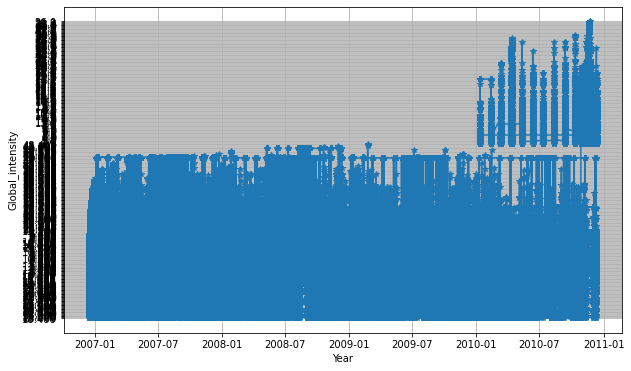

In [83]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df.Global_intensity.astype(str), marker='*' )
plt.grid()
plt.xlabel('Year')
plt.ylabel('Global_intensity')

Text(0, 0.5, 'Sub_metering_1')

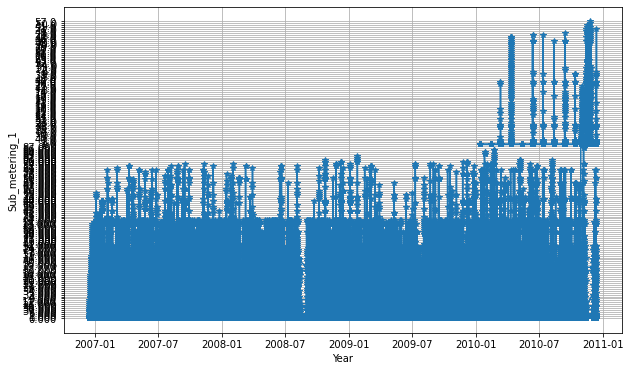

In [84]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df.Sub_metering_1.astype(str), marker='*' )
plt.grid()
plt.xlabel('Year')
plt.ylabel('Sub_metering_1')

Text(0, 0.5, 'Sub_metering_2')

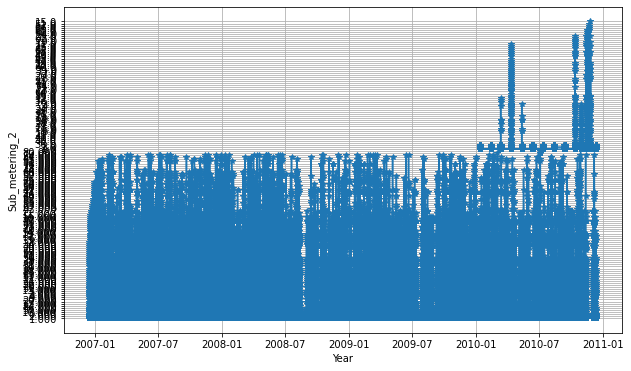

In [85]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df.Sub_metering_2.astype(str), marker='*' )
plt.grid()
plt.xlabel('Year')
plt.ylabel('Sub_metering_2')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Text(0, 0.5, 'Sub_metering_3')

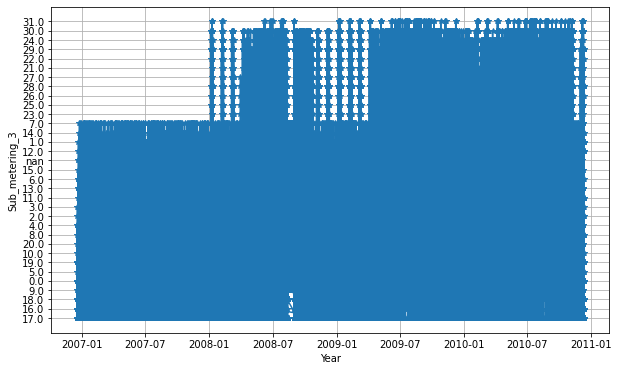

In [86]:
plt.figure(figsize=(10,6))
plt.plot(df.index, df.Sub_metering_3.astype(str), marker='*' )
plt.grid()
plt.xlabel('Year')
plt.ylabel('Sub_metering_3')

In [ ]:
#check for missing values
df.isnull().values.any()
#There are no missing values in our dataset however, in bid to explain how we handle

In [92]:
df=df

In [ ]:
import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df['Global_active_power'], model='additive')
decompose_series.plot()
plt.show()

In [ ]:
#The decomposed time series show an obvious increasing trend and seasonality variations. Recall that we have initially plotted the moving average on the last 12 months which showed that it varies with time. This suggests that the data is not stationary. We will now perform an ADF test to confirm this speculation

from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df['Global_active_power'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}') 



#From the results obtained, the p-value is greater than the critical value at a 5% #significance level and, the ADF statistic is greater that any of the critical values obtain. #This confirms that the series is indeed non-stationary.
#Convert time series to stationary by removing trend and seasonality
#Transformation and Differencing
df_log = np.log(df)
df_diff = df_log.diff(periods=1)
plt.plot(df_diff.index, df_diff.Passengers, '-')
plt.plot(df_diff.rolling(12).mean(), color='red')

In [ ]:
#Downsample to quarterly data points
df_quarterly = df.resample('3M').mean()


In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df_quarterly.index, df_quarterly['Global_active_power'], '--', marker='*', )
plt.grid()

In [59]:
from fbprophet import Prophet
df=pd.read_csv("household_power_consumption.txt",sep=';',parse_dates=[['Date', 'Time']])
df.Global_active_power.astype(str)
df["Date_Time"]=pd.to_datetime(df['Date_Time'])
df = df.rename(columns={"Date_Time": "ds", "Global_active_power": "y"})
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.



,ds,y,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
model = Prophet()
model.fit(df)

In [ ]:
#predict for the next 10 months
future = model.make_future_dataframe(periods=10, freq='M') 
forecast = model.predict(future) 
forecast.head()
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper', 'trend', 'trend_lower', 'trend_upper']]
#yhat is the prediction while yhat_lower and yhat_upper are the upper and lower boundaries

In [ ]:
model.plot(forecast)
plt.show()